Saving sm.png to sm.png


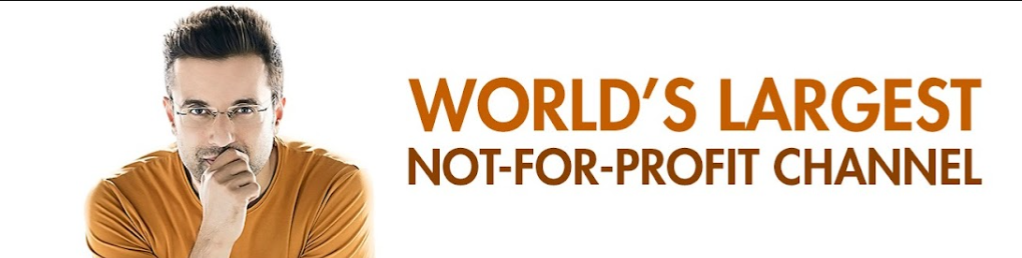

In [65]:
from IPython.display import Image, display
# Upload the image file to Colab
from google.colab import files
uploaded = files.upload()
image_filename = 'sm.png'
display(Image(filename=image_filename))

In [ ]:
# importing required libarires

import os
import googleapiclient.discovery
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import JSON
import json

In [32]:
# the YouTube API key

api_key = "YOUR API KEY"


# the list of channel_ids

channel_ids = ["UCBqFKDipsnzvJdt6UT0lMIg"] # sandeep mashewari youtube channel_id

In [33]:
# YouTube Data API client
# The client object is used to make requests to the YouTube API

youtube = googleapiclient.discovery.build("youtube", "v3", developerKey=api_key)

In [34]:
def get_channel_stats(youtube , channel_ids):

  all_data = []

  request = youtube.channels().list(
      part="snippet,contentDetails,statistics",
      id= ",".join(channel_ids))
  response = request.execute()

  for item in response["items"]:
        data =     {"channel_name" : item["snippet"]["title"],
                    "channel_published_date" : item["snippet"]["publishedAt"],
                    "subscribers" : int(item["statistics"]["subscriberCount"]),
                    "total_view" : int(item["statistics"]["viewCount"]),
                    "total_video" : int(item["statistics"]["videoCount"]),
                    "playlist_id" : item["contentDetails"]["relatedPlaylists"]["uploads"] }
        all_data.append(data)

  return all_data

In [35]:
get_channel_stats(youtube , channel_ids)

[{'channel_name': 'Sandeep Maheshwari',
  'channel_published_date': '2012-02-13T08:05:01Z',
  'subscribers': 27900000,
  'total_view': 2323065992,
  'total_video': 589,
  'playlist_id': 'UUBqFKDipsnzvJdt6UT0lMIg'}]

In [36]:
df1 = pd.DataFrame(get_channel_stats(youtube , channel_ids))

df1

,channel_name,channel_published_date,subscribers,total_view,total_video,playlist_id
0,Sandeep Maheshwari,2012-02-13T08:05:01Z,27900000,2323065992,589,UUBqFKDipsnzvJdt6UT0lMIg


# **From Playlist Id fetching all the video id**


In [37]:
playlist_id = "UUBqFKDipsnzvJdt6UT0lMIg"

In [38]:
def get_video_ids(youtube, playlist_id):
    video_ids = []

    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults=50
    )

    response = request.execute()

    for item in response["items"]:
        video_ids.append(item["contentDetails"]["videoId"])

    next_page_token = response.get("nextPageToken")  # to check if there are more pages of video IDs to fetch using "nextPageToken"

    while next_page_token is not None:
        request = youtube.playlistItems().list(
            part="snippet,contentDetails",
            playlistId=playlist_id,
            maxResults=50,
            pageToken=next_page_token
        )

        response = request.execute()

        for item in response["items"]:
            video_ids.append(item["contentDetails"]["videoId"])

        next_page_token = response.get("nextPageToken")

    return video_ids


In [39]:
video_ids = get_video_ids(youtube , playlist_id)

In [40]:
len(video_ids)

589

# **Fetching the video details from video_ids**

In [56]:
def get_vid_details(youtube, video_ids):

    all_details = []

    for i in range(0, len(video_ids), 50):  # Iterate through video_ids in steps of 50
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=",".join(video_ids[i:i+50])  # 1st i = 0 then 50 , 2nd i = 50 then 50+50
        )
        response = request.execute()

        for video in response["items"]:
            details = {
                "video_id": video["id"],
                "channelTitle": video["snippet"]["channelTitle"],
                "title": video["snippet"]["title"],
                "description": video["snippet"]["description"],
                "tags": video["snippet"].get("tags", []),
                "publishedAt": video["snippet"]["publishedAt"],
                "viewCount": video["statistics"]["viewCount"],
                "likeCount": video["statistics"]["likeCount"],
                "favoriteCount": video["statistics"]["favoriteCount"],
                "commentCount": video["statistics"]["commentCount"],
                "duration": video["contentDetails"]["duration"],
                "definition": video["contentDetails"]["definition"],
                "caption": video["contentDetails"]["caption"]
            }
            all_details.append(details)  # Append video details to all_details

    return all_details


In [57]:
df2 = pd.DataFrame(get_vid_details(youtube, video_ids))

df2

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,JblNzdZ_7pw,Sandeep Maheshwari,The Future of Technology Ft. Anshuman Singh | ...,Sandeep Maheshwari is a name among millions wh...,"[Tech, Technology, Ai, Ml, Machine learning, A...",2023-08-05T10:13:19Z,504830,29124,0,1917,PT20M32S,hd,false
1,YnSOzCKs7Pw,Sandeep Maheshwari,Biggest Parenting Mistake | Sandeep Maheshwari...,Sandeep Maheshwari is a name among millions wh...,"[Parent, Parents, Parenting, Career, Choose, C...",2023-08-03T09:05:51Z,762563,48387,0,3122,PT13M40S,hd,false
2,mKXdArLUDL0,Sandeep Maheshwari,Mahabharat Ft. Ami Ganatra | Sandeep Maheshwar...,Sandeep Maheshwari is a name among millions wh...,"[Mahabharat, Bharat, Krishna, Law of karma, Ka...",2023-07-26T10:20:29Z,1455613,76244,0,5348,PT27M24S,hd,false
3,wCac1kyhdqg,Sandeep Maheshwari,Real History of India Ft. Abhijit Chavda | San...,YouTube Channel: https://www.youtube.com/@Abhi...,"[Positive, Thinking, thoughts, best, intellige...",2023-07-19T14:30:08Z,854295,50722,0,4962,PT28M1S,hd,false
4,7tlJRhEu8Bc,Sandeep Maheshwari,Artificial Intelligence Ft. Divij Bajaj | Sand...,Sandeep Maheshwari is a name among millions wh...,"[Positive, Thinking, thoughts, best, intellige...",2023-07-17T11:06:01Z,1098555,51759,0,3275,PT36M27S,hd,false
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,5btIDfCa4fQ,Sandeep Maheshwari,Sandeep Maheshwari - Motivational Video I Powe...,"""I have worked day and night with my team to c...","[Inspirational, Inspiration, Inspiring, Video,...",2013-02-23T09:01:36Z,699414,17883,0,611,PT3M37S,hd,false
585,b8yED_7Bz3o,Sandeep Maheshwari,Sandeep Maheshwari's Inspirational Talk at IIT...,The 3 turning points that defined me... call t...,"[India, Days, iit, kanpur, three, 3 days, life...",2013-01-24T08:13:10Z,2763875,83835,0,2063,PT19M46S,sd,false
586,GsY4E6iyVYg,Sandeep Maheshwari,LAST Life Changing Seminar - By Sandeep Mahesh...,"""All my life, I have been a failure. A failure...","[Inspirational, Inspiration, Inspiring, Videos...",2013-01-15T12:57:04Z,4169109,62477,0,1578,PT2H9M30S,hd,false
587,eDiA1p5DlLg,Sandeep Maheshwari,World's Most Viewed Life Changing Video By San...,#GuinnessWorldRecord\n\nThis video has entered...,"[Inspirational, Videos, Motivational, Success,...",2012-11-23T18:40:20Z,67353869,997540,0,42134,PT2H11M28S,sd,false


In [64]:
#exporting in CSV format

df2.to_csv("SandeepMaheshwari Youtube Channel Stats.csv", index = False)


#**Fetching out all comments (with each comment date)**

In [58]:
def get_all_video_comments(youtube, video_ids):


    all_comments = []

    for video_id in video_ids:
        request = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            maxResults=100  # You can adjust the maxResults as needed
        )
        response = request.execute()

        for comment in response.get("items", []):
            comment_snippet = comment["snippet"]["topLevelComment"]["snippet"]
            comment_details = {
                "videoId": video_id,
                "textDisplay": comment_snippet["textDisplay"],
                "publishedAt": comment_snippet["publishedAt"],
                "likeCount": comment_snippet["likeCount"]
            }
            all_comments.append(comment_details)  # Append comment details to all_comments

    return all_comments


In [59]:
df3 = pd.DataFrame(get_all_video_comments(youtube, video_ids))

df3

,videoId,textDisplay,publishedAt,likeCount
0,JblNzdZ_7pw,संदीप सर आप रियल हीरो के क्यों नहीं बुला रहे ह...,2023-08-09T16:24:47Z,1
1,JblNzdZ_7pw,Sir please Prashant kirad sir ko invite kar le...,2023-08-09T16:13:22Z,0
2,JblNzdZ_7pw,Hi sir I nead your help pls reply I am really ...,2023-08-09T15:59:29Z,0
3,JblNzdZ_7pw,I request Sandeep sir k aap jinhe b apne platf...,2023-08-09T15:35:04Z,0
4,JblNzdZ_7pw,Kaise apne desh me bharata har aur crime kam h...,2023-08-09T15:27:30Z,0
...,...,...,...,...
58600,vRe-eWNhk8M,❤❤❤❤❤,2023-07-12T11:58:26Z,0
58601,vRe-eWNhk8M,Mind blowing Sandeep sir 🥺,2023-07-12T11:42:58Z,0
58602,vRe-eWNhk8M,Anyone in 2023😂,2023-07-12T09:46:56Z,3
58603,vRe-eWNhk8M,Anyone in 2023😂,2023-07-12T09:35:22Z,3


In [61]:
df3.to_csv("SandeepMaheshwari allCommentsdates.csv")

# **fecthing the only comments**

In [48]:
def get_video_comments(youtube, video_ids):


    all_comments = []

    for video_id in video_ids:
        request = youtube.commentThreads().list(
            part="snippet,replies",
            videoId=video_id)

        response = request.execute()


        comments_in_video = [comment["snippet"]["topLevelComment"]["snippet"]["textOriginal"] for comment in response["items"]]

        comments_in_video_info = {"video_id" : video_id , "comments" : comments_in_video}

        all_comments.append(comments_in_video_info)


    return all_comments

In [49]:
comments_df = pd.DataFrame(get_video_comments(youtube, video_ids))

In [50]:
comments_df

,video_id,comments
0,JblNzdZ_7pw,[संदीप सर आप रियल हीरो के क्यों नहीं बुला रहे ...
1,YnSOzCKs7Pw,"[Yr tum sb hwa me bate krre ho, parents sb sup..."
2,mKXdArLUDL0,[What mindset that boy having who told that va...
3,wCac1kyhdqg,[Sahi education accha toh tha pr sirf \nBramha...
4,7tlJRhEu8Bc,[Thoda hindi bhi bolo bhai mere ko samjh hi na...
...,...,...
584,5btIDfCa4fQ,"[😢😭😭, 0:25 sabase bada rog kya kahenge log? \n..."
585,b8yED_7Bz3o,"[OP, Love you sir ❤❤, https://youtube.com/shor..."
586,GsY4E6iyVYg,"[Best💞, 1, Legend watching 2023🎉❤ like comment..."
587,eDiA1p5DlLg,[This video has entered the Guinness World Rec...


In [60]:
comments_df.to_csv("SandeepMaheshwari Comments.csv")